In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from stats import plots

In [17]:
# Function to extract the silhouette/contour of an image
def extract_contour(image, thickness=3):
    # Convert to grayscale
    # Apply threshold to get binary image
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Create an empty image to draw the contours
    contour_image = np.zeros_like(image)
    # Draw the contours on the empty image
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), thickness)
    return contour_image

File  ./datasets/contour/tra_contour_400x300.npz


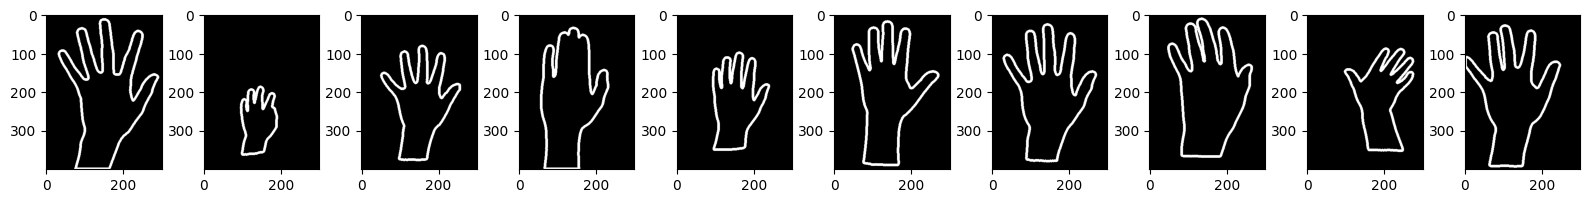

File  ./datasets/contour/val_contour_400x300.npz


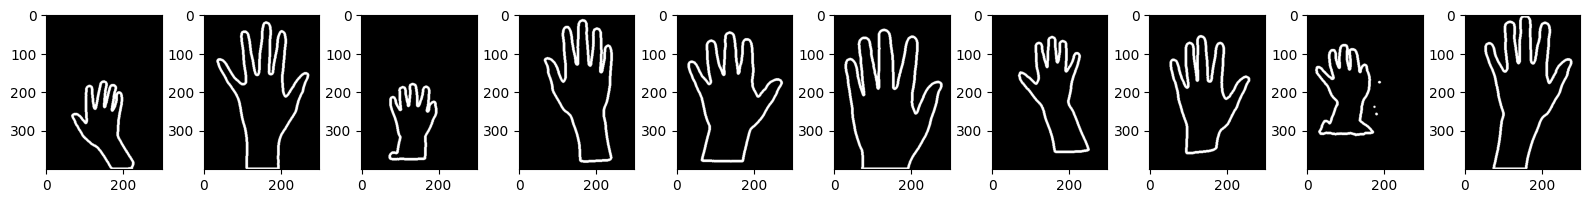

File  ./datasets/contour/tst_contour_400x300.npz


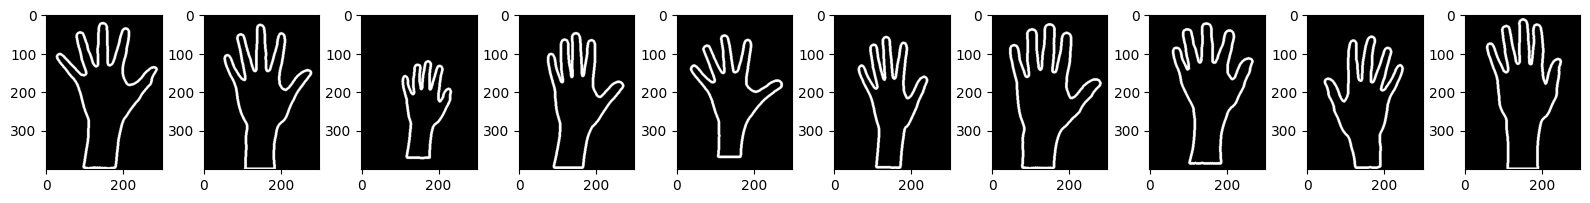

In [19]:
data_files = [
             "./datasets/only_masks/tra_masks_400x300.npz",
             "./datasets/only_masks/val_masks_400x300.npz",
             "./datasets/only_masks/tst_masks_400x300.npz",
             ]

img_res = (200, 400)

for data_file in data_files:
  file = np.load( data_file )
  data = file['data']
  metadata = file['md']
  
  # Process each image to get its contour
  contour_data = np.array([extract_contour(img, 5) for img in data])

  # Save the processed images and metadata into a new npz file
  np.savez(data_file.replace('masks', 'contour').replace('only_',''), data=contour_data, md=metadata)

  print('File ', data_file)

  plots.display_sample(data, 10)
  plots.display_sample(contour_data, 10)